## Initialisation of the development environment

In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math
import string
from datetime import datetime
import numpy as np

#The tensorflow library
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"
import tensorflow  as tf

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params) 

#append path with python modules
import importlib
import sys
sys.path.append("modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf);

import emnist_functions as emnist_fcn
importlib.reload(emnist_fcn);
#Hide GPU
#tf.config.set_visible_devices([], 'GPU')

<br/><br/>
<br/><br/>

<h1 align="center">
 Machine learning II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
University of Warsaw <br>
Faculty of Physics <br>    
</h1>

# Transposed convolution layer

Architectures using spliced and merged layers usually lead to a reduction in image size, that is `downsampling`.
Layers that lead to an increase in image size are `upsampling layers`.
The most common upsampling layer is the `transposed convolution` layer.


Figure source: [A guide to convolution arithmetic for deep learning, arXiv:1603.07285](https://arxiv.org/abs/1603.07285)

Standard representation of a convolution, as a window with weights moving across the image:

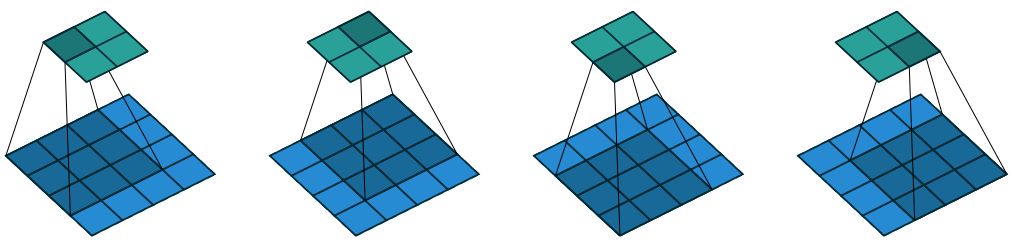

The input image in this representation is flattened to a vector:

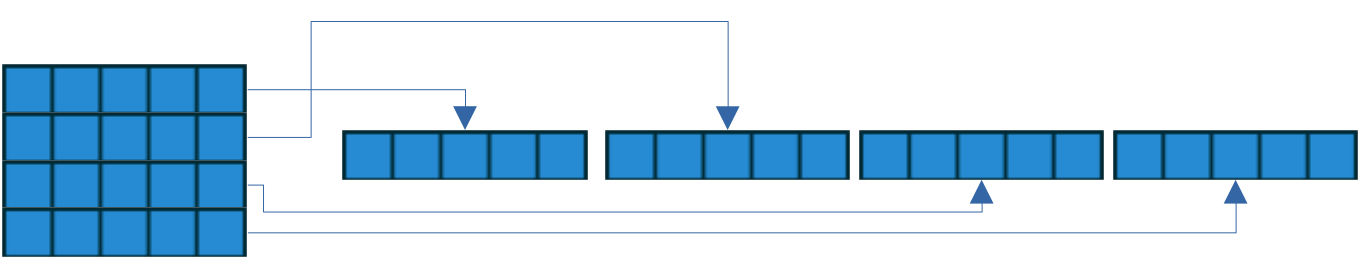

The moving window can be replaced by a single multiplication operation of a matrix representing the weights for all image elements.
For the example above, the matrix representing all weights of the convolution is of the form:

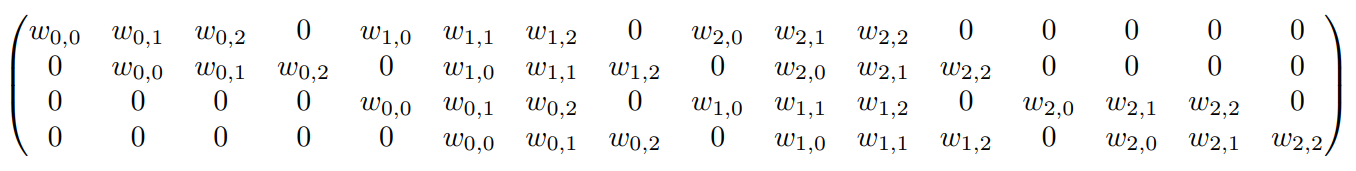

The convolution operation thus amounts to a matrix multiplication:

$$
{\huge
r = C \times d
}
$$
**r** - convolution result, of the shape (4,1)

**C** - convolution matrix, of the shape (4,16)

**d** - data vector with shape (16,1)


The resulting matrix in this example has the shape `(4,1)` and can be transformed into a matrix of the shape `(2,2)`, that we expect as the
result of the convolution in this example.

We can regard the matrix $C^{T}$ as a transpose operation that transforms vectors of the shape `(4,1)` into vectors of the shape `(16,1)`. 

$$
{\huge
r' = C^{T} \times r
}
$$
**r'** - the result of convolution with shape (16,1)

$$ $mathbf{C^{T}}$ - convolution matrix of shape (4,16).

**r** - data vector of shape (4,1)

In this way we obtained an upscaling - from a vector of size `(4,1)` we obtained a vector of size `(16,1)`.

**Note:** the transposed convolution does not reproduce the original data matrix, because in general


$$
{\huge
C^{T} \cdot C \neq 1_{16 \times 16}
}
$$
**After the transposed convolution operation, we only recover the original shape.

A transposed convolution can also be represented as a standard convolution with appropriate zero filling.

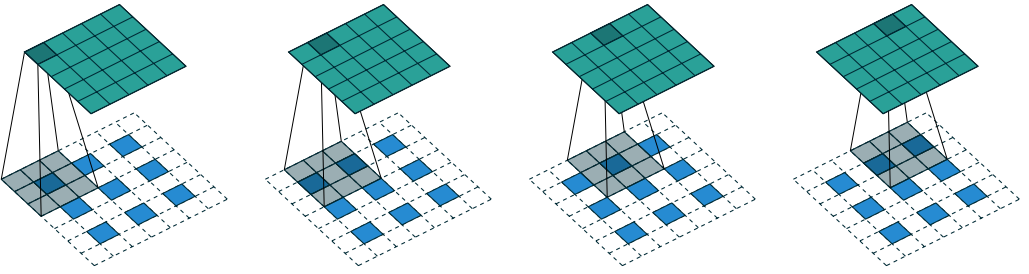

Convolution layer user interface in Keras:
```Python
tf.keras.layers.Conv2DTranspose(
    filters,             # number of filters
    kernel_size,         # filter size: tuple (n,m) or (n) for square filters
    strides=(1, 1),      # step value in both dimensions
    padding='valid',     # manner of complement: 
                         # `valid` - no complement.
                         # `same` - complement with zeros at the edges, half the size
                         # padding is half the size of the filter in the right direction
    output_padding=None, # padding on the edges of the resulting image
)
```

**Please**:

* build a transposed concolution layer with one filter of size `(3,3)` and other parameters with default values.
* give its input a drawing of size `(2,2)` filled with ones.
* output the input and output shape of the layer to the screen.

**Hint:** please refer to the documentation of `tf.keras.layers.Conv2DTranspose()` and check the possible constructor arguments. 

In [2]:
#BEGIN_SOLUTION
layer = tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size=(3,3))
data = np.full((1,2,2, 1), 1.0)

print(colored("Input shape:","blue"),data.shape)
print(colored("Output shape:","blue"),layer(data).shape)

rows = 2
kernel = 3
stride = 1
#END_SOLUTION
pass

Input shape: (1, 2, 2, 1)
Output shape: (1, 4, 4, 1)


 **Please**:

* build a transposed concolution layer with filters of size `(3,3)` and the other parameters so chosen as to obtain a transformation of (2,2,1) image intto (8,8,3) image, where the last value indicates the number of channels
* print the input and output shape of the layer to the screen.

**Hint:** please refer to the documentation  [tf.keras.layers.Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose) for the formula for the size of the Conv2DTranspose layer result.

In [3]:
#BEGIN_SOLUTION
layer = tf.keras.layers.Conv2DTranspose(filters = 2, kernel_size=(3,3), strides=4, padding='same')
data = np.full((1,2,2, 1), 1.0)

print(colored("Input shape:","blue"),data.shape)
print(colored("Output shape:","blue"),layer(data).shape)

#END_SOLUTION
pass

Input shape: (1, 2, 2, 1)
Output shape: (1, 8, 8, 2)


Standard parameters that increase the data size by a factor of two are:

```Python
tf.keras.layers.Conv2DTranspose(strides=2, padding='same')
```

**Please:**.

* **construct** a network that can generate images of circles from input data in the form of a triple:

$$
\Large{(x, y, R)}
$$ 

* the output images should have a resolution of 16$\times$16
* the radii of the circles should be less than 8
* positions can be arbitrary on the plane of the target image.

Please construct the network in two variants: 
* a fully connected network: `model_fc`.
* network with transposed convolution layers: `model_cnn`.

**Hint:** in the case of a convoluted network, one dense layer can be used to increase the size of the initial image:
```Python

  tf.keras.layers.Dense(16, activation='relu', 
                        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                        kernel_initializer="HeNormal"),
  tf.keras.layers.Reshape((4,4,1)),
```

In [4]:
##BEGIN_SOLUTION
model_cnn = tf.keras.Sequential(layers = [tf.keras.Input(shape=(3)),
                                      ##
                                       tf.keras.layers.Dense(4, activation='relu', 
                                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                          kernel_initializer="HeNormal"),
                                      tf.keras.layers.Reshape((2,2,1)),
                                      #tf.keras.layers.BatchNormalization(),  
                                      tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=4, strides=2, padding='same', 
                                                                      activation='relu',
                                                                      bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                                                      kernel_initializer="HeNormal",
                                                                     ),  
                                      #tf.keras.layers.BatchNormalization(),
                                      tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', 
                                                                      activation='relu',
                                                                      bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                                                      kernel_initializer="HeNormal",
                                                                     ), 
                                       tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', 
                                                                      activation='relu',
                                                                      bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                                                      kernel_initializer="HeNormal",
                                                                     ),   
                                      #tf.keras.layers.BatchNormalization(),
                                      tf.keras.layers.Conv2D(filters = 1, kernel_size=1, strides=1, padding='same', activation='sigmoid')                                                                   
                                      ##
                                     ],
                                     name="CNN_disc_generator")
model_cnn.summary()
#END_SOLUTION
pass

Model: "CNN_disc_generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 reshape (Reshape)           (None, 2, 2, 1)           0         
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 4, 4, 64)          1088      
 Transpose)                                                      
                                                                 
 conv2d_transpose_3 (Conv2D  (None, 8, 8, 32)          18464     
 Transpose)                                                      
                                                                 
 conv2d_transpose_4 (Conv2D  (None, 16, 16, 32)        9248      
 Transpose)                                                      
                                                

In [5]:
##BEGIN_SOLUTION
model_fc = tf.keras.Sequential(layers = [tf.keras.Input(shape=(3)),
                                      ##
                                       tf.keras.layers.Dense(16, activation='relu', 
                                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                          kernel_initializer="HeNormal"),
                                       tf.keras.layers.Dense(128, activation='relu', 
                                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                          kernel_initializer="HeNormal"),
                                       tf.keras.layers.Dense(256, activation='sigmoid', 
                                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                          kernel_initializer="HeNormal"),
                                      tf.keras.layers.Reshape((16,16,1)),                                                                
                                      ##
                                     ],
                                     name="FC_disc_generator")
model_fc.summary()
#END_SOLUTION
pass

Model: "FC_disc_generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 16)                64        
                                                                 
 dense_2 (Dense)             (None, 128)               2176      
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 reshape_1 (Reshape)         (None, 16, 16, 1)         0         
                                                                 
Total params: 35264 (137.75 KB)
Trainable params: 35264 (137.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Please:**.

* write a function `discGenerator()` that will generate pairs of `(features, label)` parameters and images of circles with resolution $N \times N$
* the parameters of the circles should be random:
    * centre coordinates in the range [0,N].
    * radius in the range [0,N/2].
* the code should use functions a of the TensorFlow package, e.g. `tf.random.uniform` wherever possible.
* circles can be generated using the `skimage.draw.disk` function (which unfortunately breaks the requirement to use only functions of the TensorFlow package)
* the function should return values using the `yield` keyword (such a function is becoming a [generator](https://book.pythontips.com/en/latest/generators.html):

```Python

def discGenerator():
    ...
    yield  features, label
```

* function can be tested as follows:
```Python

x = next(discGenerator())
print(colored("Features shape:","blue"), x[0].shape)
print(colored("Labels shape:","blue"), x[1].shape)
``` 

In [6]:
#BEGIN_SOLUTION
res = 16
def discGenerator():

    from skimage.draw import disk
    while True:
        center = tf.random.uniform([2], minval=0, maxval = res, dtype=tf.int32, name='center')
        radius = tf.random.uniform([1], minval=5, maxval = res//2, dtype=tf.int32, name='radius')        
        shape = (res, res)
        image = np.full(shape, 0)
        yy, xx = disk(center=center.numpy(), radius=radius.numpy()[0], shape=shape)
        image[xx,yy] = 1
        features = tf.concat(values=(center, radius), axis=0 )
        label = tf.constant(image, dtype=tf.int32, name='image')
        label = tf.reshape(label, (res, res, 1))
        yield  features, label

x = next(discGenerator())
print(colored("Features shape:","blue"), x[0].shape)
print(colored("Labels shape:","blue"), x[1].shape)
#END_SOLUTION
pass

Features shape: (3,)
Labels shape: (16, 16, 1)


**Please**:
* create matrix of properties and labels:
```Python
features = []
labels = []
```
and fill them with 1024 examples generated by the `discGenerator()` generator.

* print the shapes of properties and labels to the screen

In [7]:
features = []
labels = []
#BEGIN_SOLUTION
for index, item in enumerate(discGenerator()):
    if index==1024:
        break
        
    features.append(item[0])
    labels.append(item[1])

features = np.array(features).reshape(-1,3)
labels = np.array(labels).reshape(-1,res,res,1)

print(colored("Features shape:","blue"),features.shape)
print(colored("Labels shape:","blue"),labels.shape)
#END_SOLUTION
pass

Features shape: (1024, 3)
Labels shape: (1024, 16, 16, 1)


**Please:**.

* train the `model_fc` network on `1000` epochs with the parcel size set to `32`.
* draw the change of the loss function as a function of epoch number on the training and validation set.

Evaluation on training dataset:
10/10 [==============================] - 0s 45ms/step - loss: 0.1067
CPU times: user 39.9 s, sys: 2.43 s, total: 42.3 s
Wall time: 32.5 s


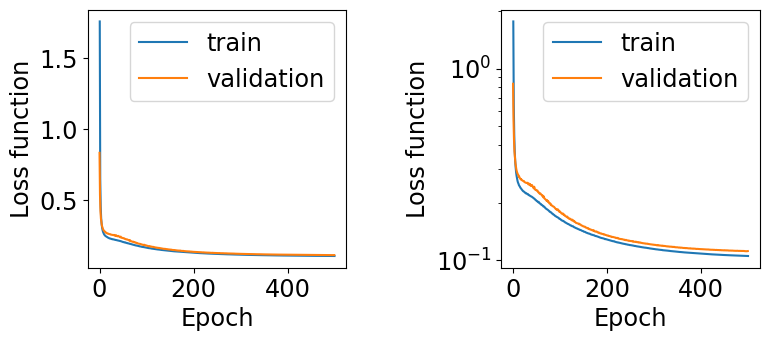

In [8]:
%%time
#configure learning process
def trainModel(model, nEpochs):
   
    initial_learning_rate = 1E-3
    batchSize = 32
      
    nStepsPerEpoch = int(len(labels)/batchSize)
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                    decay_steps=nStepsPerEpoch*10,
                    decay_rate=0.95,
                    staircase=False)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
                loss='binary_crossentropy', metrics=[])
    
    #run training
    early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, min_delta=1E-3)
    callbacks = [early_stop_callback]
    callbacks = []
    
    dataset = tf.data.Dataset.from_generator(
         discGenerator,
         output_signature=(
             (tf.TensorSpec(shape=(3), dtype=tf.int32),
             tf.TensorSpec(shape=(res,res,1), dtype=tf.int32)))
    )
    '''    
    history = model.fit(x=dataset.batch(batchSize).take(nStepsPerEpoch).cache(),
                        epochs=nEpochs, 
                        callbacks=callbacks,
                        validation_data=dataset.batch(batchSize).take(100).cache(),
                        verbose=0)
    '''
    history = model.fit(x=features, y=labels,
                        epochs=nEpochs, 
                        callbacks=callbacks,
                        validation_split = 0.1,
                        verbose=0)
    
    plf.plotTrainHistory(history)
    print(colored("Evaluation on training dataset:","blue"))
    model.evaluate(dataset.batch(batchSize).take(10))
    
nEpochs = 500
trainModel(model_fc, nEpochs)

**Please:**

* write `plotGenerated(model, params)` function, that draws the images generated by the network for a given set of four parameters.
* call `plotGenerated(model, params)` function for `model_fc` and the following parameters:
$$
\Large{(x, y, R)} = (0,0,10), (16,0,10), (8,8,5), (8,8,1)
$$

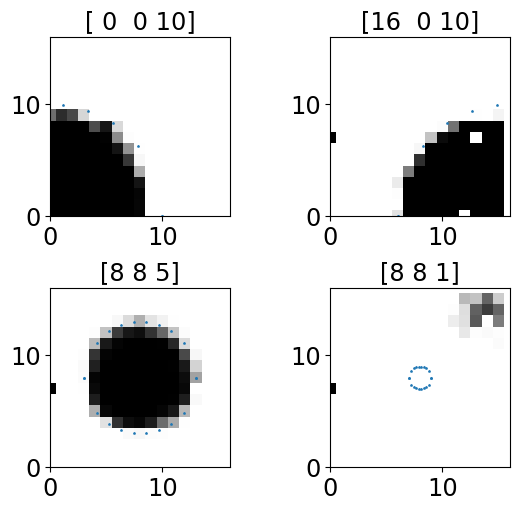

In [9]:
#BEGIN_SOLUTION
def plotGenerated(model, params):
   
    fig, axes = plt.subplots(2, 2, figsize=(5,5))
    
    for index, axis in enumerate(axes.flat):
        features = tf.Variable([params[index]], dtype=tf.int16)
        image = model(features)[0]
        axis.imshow(image, cmap='binary', origin='lower')
        axis.set_title(str(params[index])); 
        ##
        x = np.linspace(-params[index][2], params[index][2], 10)
        y = np.sqrt(params[index][2]**2-x**2)
        y = np.concatenate((y,-y), axis=0)
        x = np.concatenate((x,x), axis=0)
        x += params[index][0]
        y += params[index][1]
        axis.plot(x,y, "p", markersize=1)
        axis.set_xlim(0,image.shape[0])
        axis.set_ylim(0,image.shape[1])
    plt.subplots_adjust(bottom=0.02, left=0.02, right=0.98, wspace=0.4, hspace=0.4)
#END_SOLUTION

params = np.array( [(0,0,10), (16,0,10), (8,8,5), (8,8,1)] )
plotGenerated(model_fc, params)

**Please:**

* train `model_cnn` network
* draw generated images for the same parameters as for `model_fc` network


Evaluation on training dataset:
10/10 [==============================] - 0s 31ms/step - loss: 0.2236
CPU times: user 1min, sys: 3.11 s, total: 1min 3s
Wall time: 50.1 s


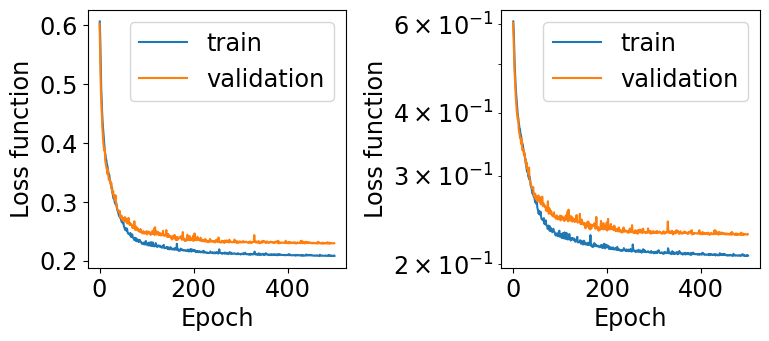

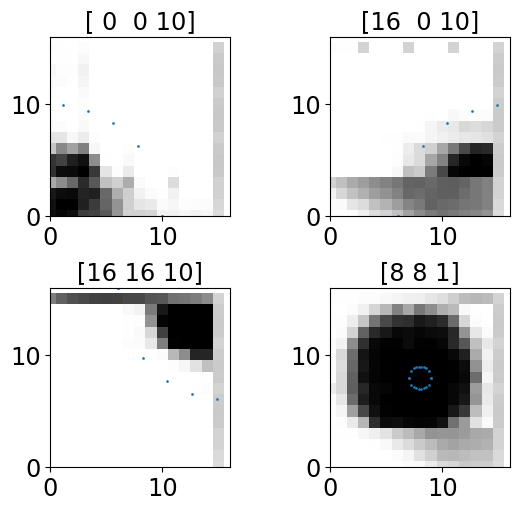

In [10]:
%%time

trainModel(model_cnn, nEpochs)

params = np.array( [(0,0,10), (16,0,10), (16,16,10), (8,8,1)] )
plotGenerated(model_cnn, params)

# Autoencoder architecture

A network with a convolution does not train very well. The reason may be the incorrect representation of the circle by three numbers: `(x,y,R)`.
Maybe there is some representation that will lead to a good model faster?

Instead of experimenting with different representations ourselves, we will construct a network that finds it by itself - an **autoencoder (AE)**

The AE architecture consists of two parts:

**encoding network** - a network that creates a representation of a given size from the input data. The space to which the coding network leads is called the `hidden space` or `bottlenck` - because it is the place where the number of parameters describing the problem is usually the smallest

**decoding network** - the network that reconstructs the original form of the input data from the representation in the hidden space.

During training, the images from the decoder are compared with the input data. The weights are changed to minimise the difference between the two.

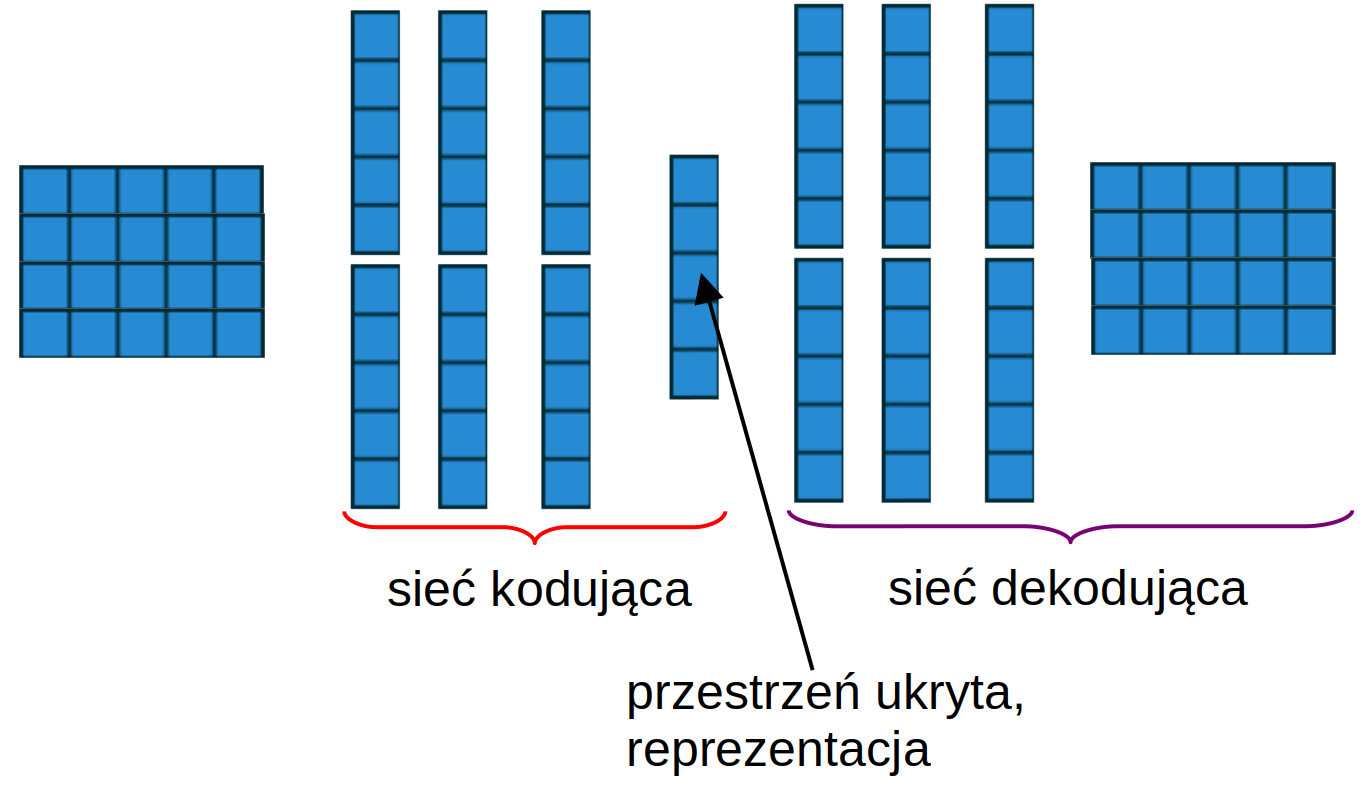

**Please:**

* create an `encoder` model - a network that performs the encoding operation, i.e. the reshaping of data
$$
\Large{    
(16,16,1) \rightarrow (2,2,1)
}
$$
* use the `tf.keras.Sequential` class
* print a summary of the model to the screen.

In [11]:
#BEGIN_SOLUTION
encoder = tf.keras.Sequential(layers = [tf.keras.Input(shape=(16,16,1)),
                                        tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
                                        tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
                                        tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
                                        tf.keras.layers.Conv2D(filters=1, kernel_size=2, strides=1, padding='same', activation='relu')],
                                         name='encoder')
encoder.summary()
#END_SOLUTION
pass

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 4, 4, 32)          0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 32)          9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 1)           129       
                                                                 
Total params: 9697 (37.88 KB)
Trainable params: 9697 (37.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Please:**

* create a model `decoder` - a network that performs the decoding operation, i.e. changing the shape of the data
$$
\Large{    
(2,2,1) \rightarrow (16,16,1)
}
$$
* use the `tf.keras.Sequential` class
* please use transposed convoluted layers with the same settings as in the encoding network.
* please print a summary of the model to the screen.

In [12]:
#BEGIN_SOLUTION
decoder =  tf.keras.Sequential(layers = [tf.keras.Input(shape=(2,2,1)),
                                         tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
                                         tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
                                         tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'), 
                                         tf.keras.layers.Conv2D(filters=1, kernel_size=2, strides=1, padding='same', activation='sigmoid')],
                                name="decoder")
decoder.summary()
#END_SOLUTION
pass

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_5 (Conv2D  (None, 4, 4, 32)          320       
 Transpose)                                                      
                                                                 
 conv2d_transpose_6 (Conv2D  (None, 8, 8, 32)          9248      
 Transpose)                                                      
                                                                 
 conv2d_transpose_7 (Conv2D  (None, 16, 16, 32)        9248      
 Transpose)                                                      
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 1)         129       
                                                                 
Total params: 18945 (74.00 KB)
Trainable params: 18945 (74.00 KB)
Non-trainable params: 0 (0.00 Byte)
_______________________

**Please:**

* create  `model_cnn_ae` - autoencoder, a sequential network, which consists of an encoding network, and a decoding network:
```Python

[encoder, decoder]

```
* print model summary to the screen

In [13]:
##BEGIN_SOLUTION
model_cnn_ae = tf.keras.Sequential([encoder, decoder], name="autoencoder")
model_cnn_ae.build(input_shape=(16,16,1))
model_cnn_ae.summary()
#END_SOLUTION
pass

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Sequential)        (None, 2, 2, 1)           9697      
                                                                 
 decoder (Sequential)        (None, 16, 16, 1)         18945     
                                                                 
Total params: 28642 (111.88 KB)
Trainable params: 28642 (111.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Please:**

* conduct autocoder training
* use the training settings as for previous models

CPU times: user 1min 17s, sys: 3.62 s, total: 1min 21s
Wall time: 1min 5s


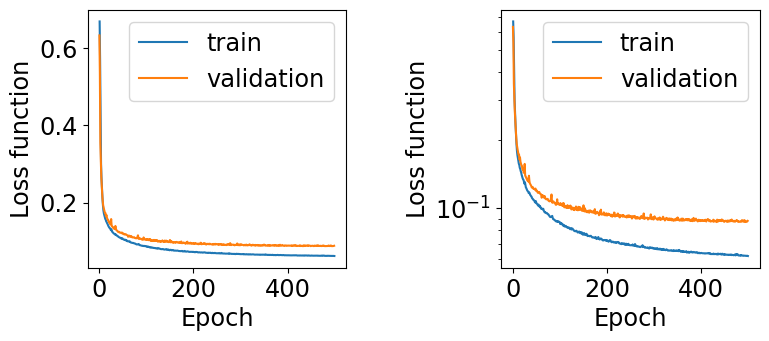

In [14]:
%%time
initial_learning_rate = 1E-3
batchSize = 32
    
nStepsPerEpoch = int(len(labels)/batchSize)
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=nStepsPerEpoch*10,
                decay_rate=0.95,
                staircase=False)

model = model_cnn_ae
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='binary_crossentropy')
    
#run training
history = model.fit(x=labels, y=labels,
                        epochs=nEpochs, 
                        validation_split = 0.1,
                        verbose=0)
    
plf.plotTrainHistory(history)

**Please:**

* print the parameters of the first example from the dataset onto the screen.
* run the encoder on the first example image
* print the encoded form of the image to the screen.

In [15]:
#BEGIN_SOLUTION
index = 0
print(colored("Human readable disc representation:","blue"), features[index])
z = encoder.predict(labels[index:index+1])
print(colored("AI readable disc representation:","blue"), z)
#END_SOLUTION
pass

Human readable disc representation: [6 1 6]
1/1 [==============================] - 0s 80ms/step
AI readable disc representation: [[[[1.615596 ]
   [2.7417028]]

  [[5.8194833]
   [6.3786564]]]]


**Please:**

* write a function `plotDecoded(model)` that draws decoded drawings for four random examples from the training data.
* the drawings should be signed with parameter values
* drawings should contain circles drawn with nominal parameter values

1/1 [==============================] - 0s 13ms/step - loss: 0.0191


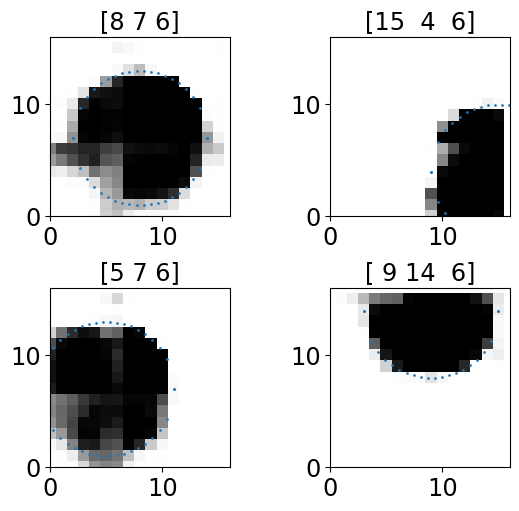

In [16]:
def plotDecoded(model):
   
    fig, axes = plt.subplots(2, 2, figsize=(5,5))

    data_indices = tf.random.uniform([4], 0, len(labels), dtype=tf.int32)
    data_indices = np.array([1,2,3,4])
    for index, axis in enumerate(axes.flat):
        
        data_index = data_indices[index]
        encoded = labels[data_index:data_index+1]

        model.evaluate(encoded,encoded)
        
        z = encoder.predict(encoded, verbose=0)
        image = decoder.predict(z, verbose=0)[0,:,:,0]
        axis.imshow(image, cmap='binary', origin='lower')
        axis.set_title(str(features[data_index]));
        ##
        x = np.linspace(-features[data_index][2], features[data_index][2], 20)
        y = np.sqrt(features[data_index][2]**2-x**2)
        y = np.concatenate((y,-y), axis=0)
        x = np.concatenate((x,x), axis=0)
        y += features[data_index][1]
        x += features[data_index][0]
        axis.plot(x,y, "p", markersize=1) 
        axis.set_xlim([0, image.shape[0]])
        axis.set_ylim([0, image.shape[1]])
        
    plt.subplots_adjust(bottom=0.02, left=0.02, right=0.98, wspace=0.4, hspace=0.4)

plotDecoded(model_cnn_ae)

# Homework

Construct a network that can generate images of circles with a resolution of `(256, 256)`.


**Please:**

* generate 1024 examples of circle images with a resolution of `(256,256)` with random parameters:
    * centre coordinates in the range [0,N].
    * radius in the range [0,N/2].
     
* construct a **fully connected network** that generates images from a triple:
$$
\Large{(x, y, R)}
$$

* construct an **autoencoding network** with a hidden dimension of the shape `(8,8,1)`.
* train both networks 
* draw four randomly decoded examples for the best result obtained for both networks.
* note the size of the models

In [17]:
##Data generation
#BEGIN_SOLUTION
res = 256
def discGenerator():

    from skimage.draw import disk
    while True:
        center = tf.random.uniform([2], minval=0, maxval = res, dtype=tf.int32, name='center')
        radius = tf.random.uniform([1], minval=5, maxval = res//2, dtype=tf.int32, name='radius')        
        shape = (res, res)
        image = np.full(shape, 0)
        yy, xx = disk(center=center.numpy(), radius=radius.numpy()[0], shape=shape)
        image[xx,yy] = 1
        features = tf.concat(values=(center, radius), axis=0 )
        label = tf.constant(image, dtype=tf.int32, name='image')
        label = tf.reshape(label, (res, res, 1))
        yield  features, label



features = []
labels = []

for index, item in enumerate(discGenerator()):
    if index==1024:
        break
        
    features.append(item[0])
    labels.append(item[1])

features = np.array(features).reshape(-1,3)
labels = np.array(labels).reshape(-1,res,res,1)

print(colored("Features shape:","blue"),features.shape)
print(colored("Labels shape:","blue"),labels.shape)
#END_SOLUTION
pass

Features shape: (1024, 3)
Labels shape: (1024, 256, 256, 1)


Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 32)          0   

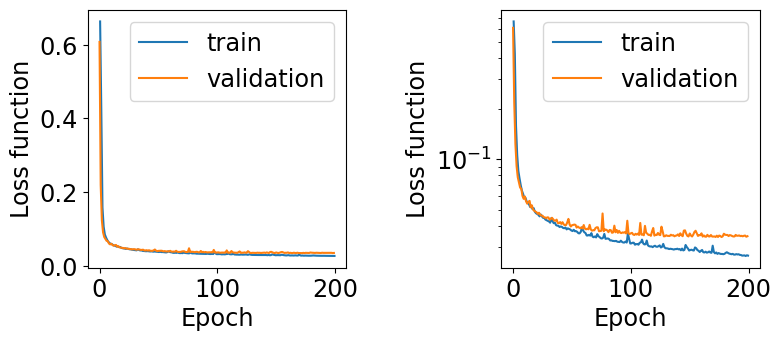

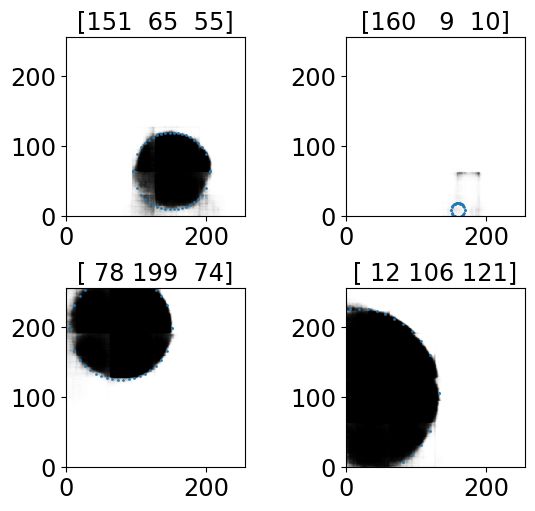

In [18]:
%%time
## autoencoder model
#BEGIN_SOLUTION

#Model definition
encoder = tf.keras.Sequential(layers = [tf.keras.Input(shape=(256,256,1)),
                                        tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
                                        tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
                                        tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
                                        tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
                                        tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
                                        tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
                                        tf.keras.layers.Conv2D(filters=1, kernel_size=2, strides=1, padding='same', activation='relu')],
                                         name='encoder')
encoder.summary()

decoder =  tf.keras.Sequential(layers = [tf.keras.Input(shape=(4,4,1)),
                                         tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
                                         tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
                                         tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
                                         tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
                                         tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
                                         tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
                                         tf.keras.layers.Conv2D(filters=1, kernel_size=2, strides=1, padding='same', activation='sigmoid')],
                                name="decoder")
decoder.summary()

model_cnn_ae = tf.keras.Sequential([encoder, decoder], name="autoencoder")
model_cnn_ae.build(input_shape=(256,256,1))
model_cnn_ae.summary()

###Training
nEpochs = 200
initial_learning_rate = 1E-3
batchSize = 32
    
nStepsPerEpoch = int(len(labels)/batchSize)
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=nStepsPerEpoch*10,
                decay_rate=0.95,
                staircase=False)

model = model_cnn_ae
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='binary_crossentropy')
    
#run training
history = model.fit(x=labels, y=labels,
                        epochs=nEpochs, 
                        validation_split = 0.1,
                        verbose=0)
    
plf.plotTrainHistory(history)

#Evaluation
plotDecoded(model_cnn_ae)

Model: "FC_disc_generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                64        
                                                                 
 dense_5 (Dense)             (None, 128)               2176      
                                                                 
 dense_6 (Dense)             (None, 65536)             8454144   
                                                                 
 reshape_2 (Reshape)         (None, 256, 256, 1)       0         
                                                                 
Total params: 8456384 (32.26 MB)
Trainable params: 8456384 (32.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Evaluation on training dataset:
10/10 [==============================] - 0s 39ms/step - loss: 0.6514
CPU times: user 56 s, sys: 7.99 s, total

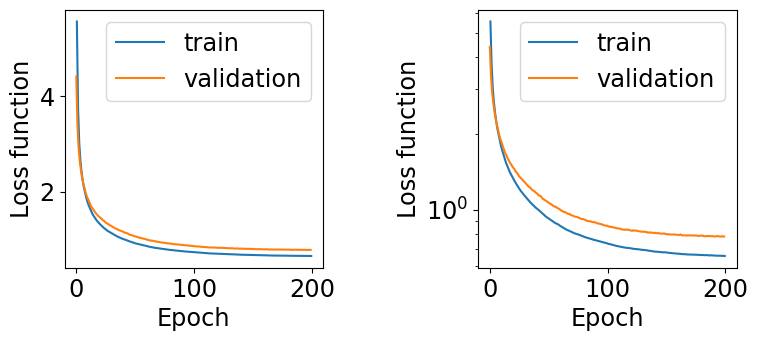

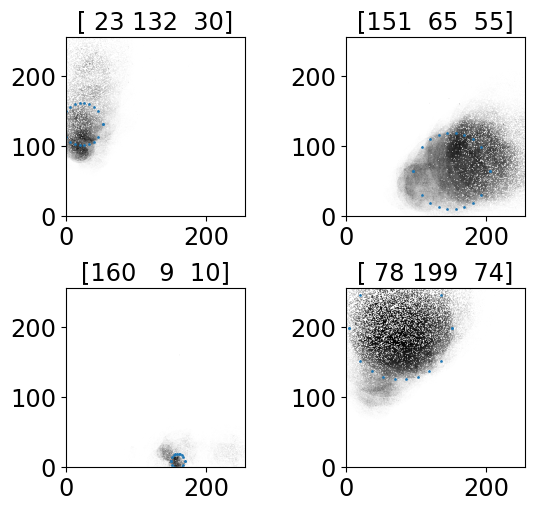

In [19]:
%%time
##fully connected model
##BEGIN_SOLUTION
#model definition
model_fc = tf.keras.Sequential(layers = [tf.keras.Input(shape=(3)),
                                      ##
                                       tf.keras.layers.Dense(16, activation='relu', 
                                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                          kernel_initializer="HeNormal"),
                                       tf.keras.layers.Dense(128, activation='relu', 
                                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                          kernel_initializer="HeNormal"),
                                       tf.keras.layers.Dense(256*256, activation='sigmoid', 
                                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                          kernel_initializer="HeNormal"),
                                      tf.keras.layers.Reshape((256,256,1)),                                                                
                                      ##
                                     ],
                                     name="FC_disc_generator")
model_fc.summary()


#model training
trainModel(model_fc, nEpochs)

#model evaluation
params = features[0:4]
plotGenerated(model_fc, params)

#END_SOLUTION
pass

In [20]:
nEpochs

200